In [1]:
!pip install numpy matplotlib
!pip install https://lenna.app/lenna-plugins-extra/lenna_plugins_extra_py-0.1.1-cp38-cp38-linux_x86_64.whl

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import lenna_plugins_extra_py

In [3]:
image = Image.open("data/lenna.png")
img = asarray(image)
print(img.shape)

(512, 512, 3)


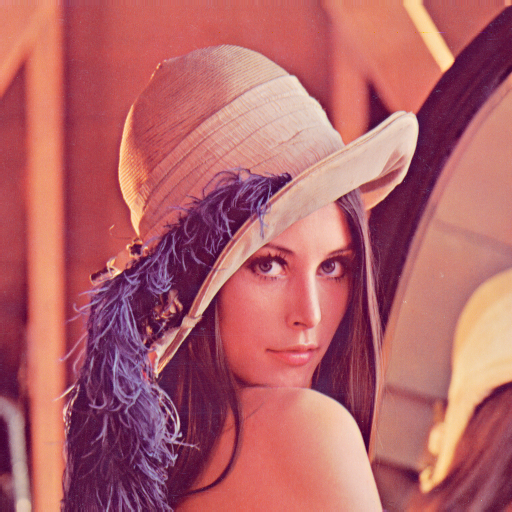

In [4]:
image

# denoise

Denoise removes noise in your images. But it is slow...

In [5]:
config = lenna_plugins_extra_py.denoise.default_config()
config['samples'] = 64
config['threshold'] = 50

process the image and display blurred result

CPU times: user 21.2 s, sys: 50.3 ms, total: 21.3 s
Wall time: 15.8 s


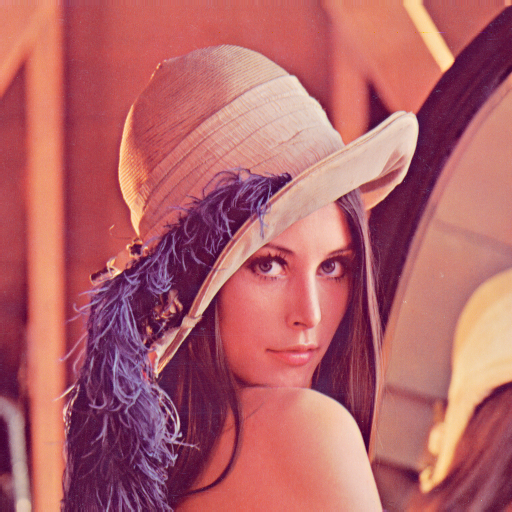

In [6]:
%time denoised = lenna_plugins_extra_py.denoise.process(config, img)
denoised_img = Image.fromarray(denoised, 'RGB')
denoised_img

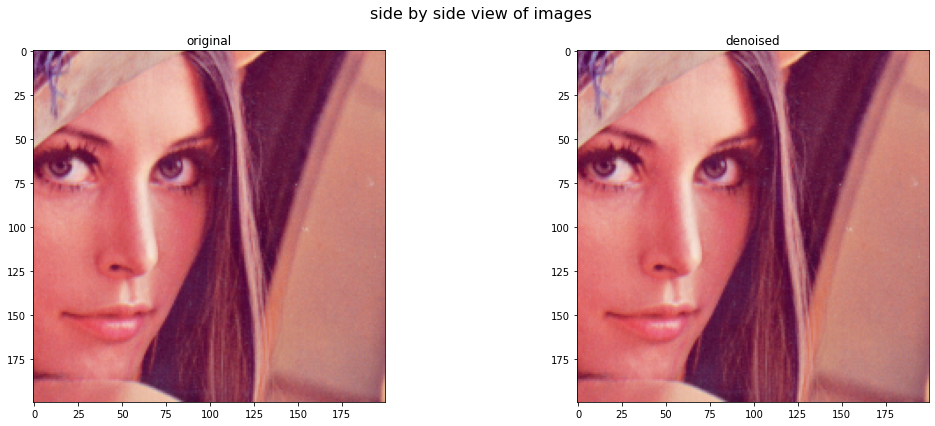

In [7]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(image.crop((250, 200, 450, 400)))
ax[1].imshow(denoised_img.crop((250, 200, 450, 400)))

ax[0].set_title('original')
ax[1].set_title('denoised')

title = 'side by side view of images'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

# text
Add some text.

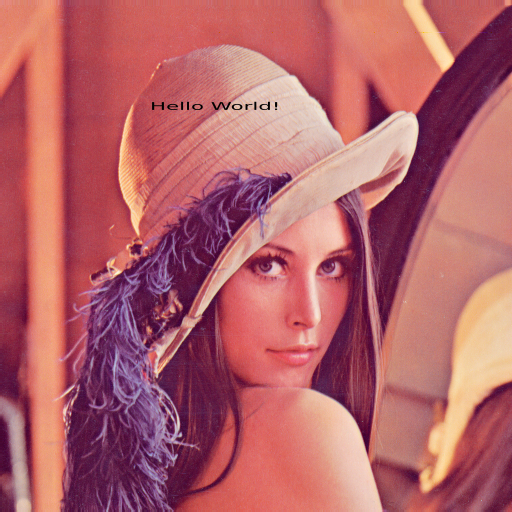

In [8]:
config = lenna_plugins_extra_py.text.default_config()
config['text'] = 'Hello World!'
config['x'] = 150
config['y'] = 100
texted = lenna_plugins_extra_py.text.process(config, img)
texted_img = Image.fromarray(texted, 'RGB')
texted_img

# watermark
Add a watermark.

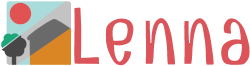

In [9]:
import base64
with open("data/banner.png", "rb") as img_file:
    watermark = base64.b64encode(img_file.read())
banner = Image.open("data/banner.png")
banner

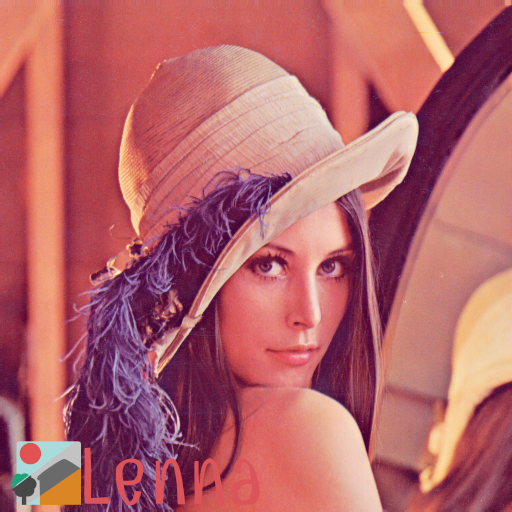

In [10]:
config = lenna_plugins_extra_py.watermark.default_config()
config['watermark'] = watermark.decode('utf-8')
config['x'] = 10
config['y'] = 440
marked = lenna_plugins_extra_py.watermark.process(config, img)
marked_img = Image.fromarray(marked, 'RGB')
marked_img